<a href="https://colab.research.google.com/github/emmad225/DataScienceCoursework/blob/main/DSHW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HOMEWORK 3

1.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

a.

In [ ]:
df = pd.read_csv('ames_house_prices.csv')

b.

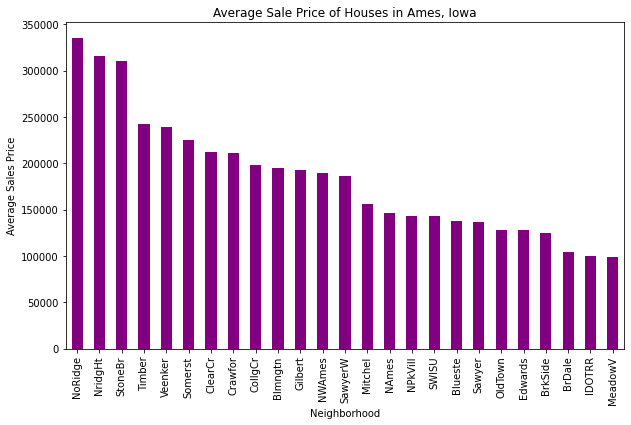

In [ ]:
sorted_avg = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending = False)

sorted_avg.plot(kind='bar', title='Average Sale Price of Houses in Ames, Iowa',
               ylabel='Average Sales Price', xlabel='Neighborhood', color = 'purple', figsize=(10, 6))

c.

In [ ]:
sawyer = df.query('Neighborhood == "Sawyer"')['SalePrice']
oldTown = df.query('Neighborhood == "OldTown"')['SalePrice']
print(np.var(sawyer), np.var(oldTown))

res = stats.ttest_ind(a=sawyer, b=oldTown, equal_var=True)
display(res)

492557434.90065736 2747552193.6970787


Ttest_indResult(statistic=1.323045781554044, pvalue=0.18745310017370057)

The p-value of this test is 0.18. Therefore this does not reject the null hypothesis and is proven to not be statistically significant because it does not lie in the range of 0.001-0.05. Additionally, because the t-statistic is a small value 1.32 (relatively close to 0), the null hypothesis can not be rejected.

#2.


a.


In [ ]:
import statsmodels.api as sm
import numpy as np

Y = df['SalePrice']
X = df[['GarageArea', 'BedroomAbvGr', 'FullBath', 'SqFt']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

In [ ]:
from statsmodels.formula.api import ols
model = ols("SalePrice ~ GarageArea + BedroomAbvGr + FullBath + SqFt", data=df)
results = model.fit()
results.summary()

The coefficient of GarageArea is 109.999586. This means that if the garage area increases by one unit or square foot, the sales price would also increase by approximately $109. This coefficient is statistically significant because it has a p-value of 0.

b.

In [ ]:
price = results.params[0] + (500 * results.params[1]) + (3*results.params[2]) + (3* results.params[3]) + (1800 * results.params[4])
print(price)

236170.4457180267


My model predicts the SalePrice of a house to be $236,170.45 for a house with GaragaArea 500 sqft, 3 BedroomAbvGr, 3 FullBath, and 1800 sq ft.


c.

In [ ]:
df['prediction']=results.predict(df)

Text(0, 0.5, 'Predicted SalePrice')

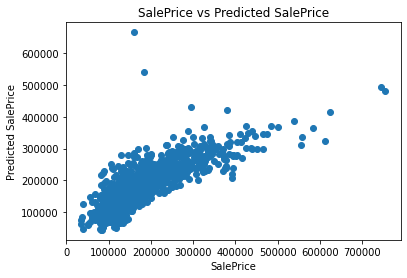

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['SalePrice'], df['prediction'])
plt.title("SalePrice vs Predicted SalePrice")
plt.xlabel('SalePrice') #x label
plt.ylabel('Predicted SalePrice') #y label

A majority of the SalePrice vs Predicted SalePrice values are simialr. This is seen above where a cluster of the data is concentrated around

```
$100,000 - $300,000
```
However, a few outliers in the data do exist as seen above. The SalePrice in many instances seems to be much higher than the predicted SalePrice per home.

d.

In [ ]:
df['abserr'] = (((df['SalePrice'] - df['prediction']).abs())/(df['SalePrice']))

In [ ]:
RL = df.loc[df.MSZoning =='RL']
RH = df.loc[df.MSZoning =='RH']

In [ ]:
RL["abserr"].mean()

0.1720921153621819

In [ ]:
RH["abserr"].mean()

0.28065738516018085

The Mean of the Absolute Percent Error (MAPE) for houses in low density neighborhoods is 17%, whereas the MAPE for houses in high density neighborhoods is 28%. This means that in each neighborhood, the actual SalePrice vs the predicted SalePrice differs by 17% and 28% in these two different zones. From these two MAPE values, we can conclude that the model is not fair across these two groups. In high density neighborhoods, a price difference of 28% is much higher then a price difference of 17%. Therefore, in high density neighborhoods, the SalePrice is less accurate. This is primarily because of the lack of data that exists for high density neighborhoods comparitively to low density neighborhoods. In high density neighborhoods, individuals will be less likely to pay more than the lower, predicted SalePrice even if your home is worth exponentially more than this value.